In [1]:
import xarray as xr
import xesmf as xe
import numpy as np 
import pathlib as pl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
#ASO DATA

In [3]:
# open up the swe data 
aso_dat1 = pl.Path("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/swe_regrid_250m_ASO_250M_SWE_bilin_20180331_latlon.nc")
aso_dat2 = pl.Path("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/swe_regrid_250m_ASO_250M_SWE_bilin_20190407_latlon.nc")

# open up hte snow depth data 
aso_sd_dat1 = pl.Path("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/sd_regrid_250m_ASO_SD_250m_bilin_20180330_latlon.nc")
aso_sd_dat2 = pl.Path("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/sd_regrid_250m_ASO_SD_250m_bilin_20190407_latlon.nc")


# open up the model data 
mp08_run = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs2/model_out_wy2018_Thompson.nc")
mp10_run = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs2/model_out_wy2018_Morrison.nc")
mp55_run = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs2/model_out_wy2018_Ishmael.nc")
prism_run = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs2/model_out_wy2018_prism.nc")

mp08_run19 = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs2/model_out_wy2019_Thompson.nc")
mp10_run19 = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs2/model_out_wy2019_Morrison.nc")
mp55_run19 = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs2/model_out_wy2019_Ishmael.nc")
prism_run19 = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs2/model_out_wy2019_prism.nc")



# geog file 
geog = xr.open_dataset("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/geo_em_updatedDEM.d01.nc")
east_mask = geog.EAST_MASK.where(geog.EAST_MASK >0)
other_mask = geog.OTHR_MASK.where(geog.OTHR_MASK >0)

### NoahMP SWE Run w/ SubGrid adjustment of Precip (.002/m precip lapse rate adjustment) and T2 adjustment

In [4]:
mp08_lsmout_2018 = xr.open_dataset(mp08_run)
mp10_lsmout_2018 = xr.open_dataset(mp10_run)
mp55_lsmout_2018 = xr.open_dataset(mp55_run)
prism_lsmout_2018 = xr.open_dataset(prism_run)

mp08_lsmout_2019 = xr.open_dataset(mp08_run19)
mp10_lsmout_2019 = xr.open_dataset(mp10_run19)
mp55_lsmout_2019 = xr.open_dataset(mp55_run19)
prism_lsmout_2019 = xr.open_dataset(prism_run19)




### GET THE ASO DATA

In [5]:
mp55_lsmout_2019x = xr.open_dataset("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs2tcorr/model_out_wy2019_Ishmael.nc")

In [79]:
# open up all of the swe data ... 
aso_dat1 = pl.Path("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/swe_regrid_250m_ASO_250M_SWE_bilin_20180331_latlon.nc")

swe1=xr.open_dataset(aso_dat1)
swe2=xr.open_dataset(aso_dat2)

sd1=xr.open_dataset(aso_sd_dat1).Band1
sd2=xr.open_dataset(aso_sd_dat2).Band1

# get just the swe in mm 
swevar1 = swe1.where(swe1>0).Band1
swevar2 = swe2.where(swe2>0).Band1

# get the density ...
dens1 = swevar1.where(sd1 > 0, swevar1/sd1)
dens2 = swevar2.where(sd2 > 0, swevar2/sd2) #swevar2/sd2


# use the thompson density 
mask18 = swevar1.where(swevar1 > 0, np.nan)
mask18 = mask18/mask18
mask18 = (mask18 * other_mask)


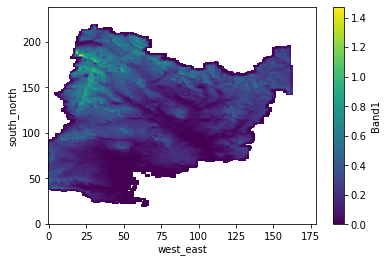

In [81]:
dens1.plot()

In [7]:
## COMPTUE THE NOAH MP DENSITY 
## THE DIFFERENT MP RUNS ARE +/- 10 Percent 
d1 = pd.to_datetime("2018-03-31")
d2 = pd.to_datetime("2019-04-07")

ish_dens_18 = ((mp55_lsmout_2018.SNEQV/1000. / mp55_lsmout_2018.SNOWH).sel(time=d1))
ish_dens_19 = ((mp55_lsmout_2019.SNEQV/1000. / mp55_lsmout_2019.SNOWH).sel(time=d2))


morr_dens_18 = ((mp10_lsmout_2018.SNEQV/1000. / mp10_lsmout_2018.SNOWH).sel(time=d1))
morr_dens_19 = ((mp10_lsmout_2019.SNEQV/1000. / mp10_lsmout_2019.SNOWH).sel(time=d2))


thomp_dens_18 = ((mp08_lsmout_2018.SNEQV/1000. / mp08_lsmout_2018.SNOWH).sel(time=d1))
thomp_dens_19 = ((mp08_lsmout_2019.SNEQV/1000. / mp08_lsmout_2019.SNOWH).sel(time=d2))


In [8]:
print(thomp_dens_18.mean().values, morr_dens_18.mean().values, ish_dens_18.mean().values)


0.26453132547478286 0.2790138604068731 0.2841877549918055


In [9]:
print(thomp_dens_19.mean().values, morr_dens_19.mean().values, ish_dens_19.mean().values)


0.38069600481586424 0.3831025578020731 0.38126215115418166


In [10]:
# recompute the aso swe...
aso_swe_corr18 = (sd1 * morr_dens_18 ) * 1000.
aso_swe_corr19 = (sd2 * morr_dens_19 ) * 1000.

aso_sd_corr18 = sd1
aso_sd_corr19 = sd2


In [11]:
def histogram_intersection(v1, v2, bins=10):
    # mask out the nans ...
    v1 = (v1 - v1.mean())/v1.std()
    v2 = (v1 - v1.mean())/v1.std()

    v1 = v1.values.flatten()
    v2 = v2.values.flatten()
    
    # make the hists
    histv1, bev1 = np.histogram(v1[~np.isnan(v1)], bins)
    histv2, bev2 = np.histogram(v2[~np.isnan(v2)], bins)

    # do the historgram thing...
    sm = 0
    for i in range(len(histv1)):
        sm += min(histv1[i], histv2[i])
    return sm/sum(histv2)


def pearsonr(v1,v2):
    v1 = v1.values.flatten()
    v2 = v2.values.flatten()
    mask = ~np.isnan(v1) & ~np.isnan(v2)
    v1 = v1[mask]
    v2 = v2[mask]

    corr = np.corrcoef(v1,v2)[0,1]
    return corr

def beta(v1,v2):
    v1 = v1.values.flatten()
    v2 = v2.values.flatten()
    mask = ~np.isnan(v1) & ~np.isnan(v2)
    v1 = v1[mask]
    v2 = v2[mask]
    
    # now compute...
    a = np.std(v1)/np.mean(v1)
    b = np.std(v2)/np.mean(v2)
    
    return a/b

def spaef(v1,v2,bins=10):
    a = histogram_intersection(v1, v2, bins=bins)
    b = beta(v1, v2)
    p = pearsonr(v1,v2)
    return 1 - np.sqrt((1-a)**2 + (1-b)**2 + (1-p)**2)

# a = (mp08_lsmout_2019.SNEQV.sel(time=d2)*other_mask).isel(Time=0)
# b = (mp10_lsmout_2018.SNEQV.sel(time=d1)*other_mask).isel(Time=0)
# c = (mp55_lsmout_2018.SNEQV.sel(time=d1)*other_mask).isel(Time=0)




In [12]:
#prism_lsmout_2019.SNEQV.sel(time=d2)

In [13]:
# get the swe...
mp08_swe_2018 =  mp08_lsmout_2018.SNEQV.sel(time=d1)*mask18
mp10_swe_2018 =  mp10_lsmout_2018.SNEQV.sel(time=d1)*mask18
mp55_swe_2018 =  mp55_lsmout_2018.SNEQV.sel(time=d1)*mask18
prism_swe_2018 = prism_lsmout_2018.SNEQV.sel(time=d1)*mask18

mp08_swe_2019 =  mp08_lsmout_2019.SNEQV.sel(time=d2)*mask18
mp10_swe_2019 =  mp10_lsmout_2019.SNEQV.sel(time=d2)*mask18
mp55_swe_2019 =  mp55_lsmout_2019.SNEQV.sel(time=d2)*mask18
prism_swe_2019 = prism_lsmout_2019.SNEQV.sel(time=d2)*mask18


# get the snow depths ...
mp08_sd_2018 =  mp08_lsmout_2018.SNOWH.sel(time=d1)*mask18
mp10_sd_2018 =  mp10_lsmout_2018.SNOWH.sel(time=d1)*mask18
mp55_sd_2018 =  mp55_lsmout_2018.SNOWH.sel(time=d1)*mask18
prism_sd_2018 = prism_lsmout_2018.SNOWH.sel(time=d1)*mask18

mp08_sd_2019 =  mp08_lsmout_2019.SNOWH.sel(time=d2)*mask18
mp10_sd_2019 =  mp10_lsmout_2019.SNOWH.sel(time=d2)*mask18
mp55_sd_2019 =  mp55_lsmout_2019.SNOWH.sel(time=d2)*mask18
prism_sd_2019 = prism_lsmout_2019.SNOWH.sel(time=d2)*mask18


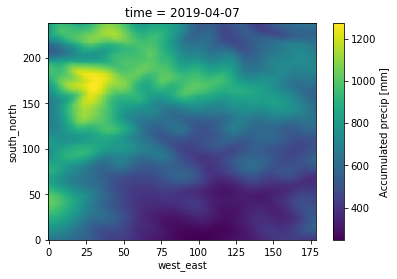

In [44]:
mp08_lsmout_2019.ACCPRCP.sel(time=d2).plot()

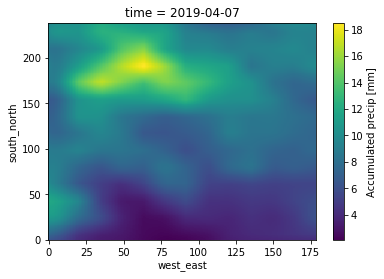

In [43]:
prism_lsmout_2019.ACCPRCP.sel(time=d2).plot()

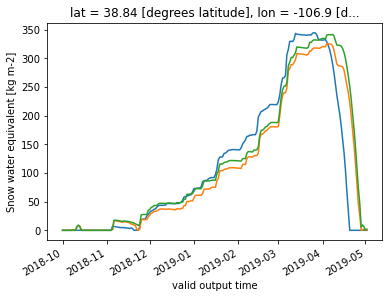

In [49]:
prism_lsmout_2019.SNEQV.isel(west_east=100, south_north=100).plot()
mp10_lsmout_2019.SNEQV.isel(west_east=100, south_north=100).plot()
mp08_lsmout_2019.SNEQV.isel(west_east=100, south_north=100).plot()

0.6003562308978441 0.6230706267339456 0.6036305391142089


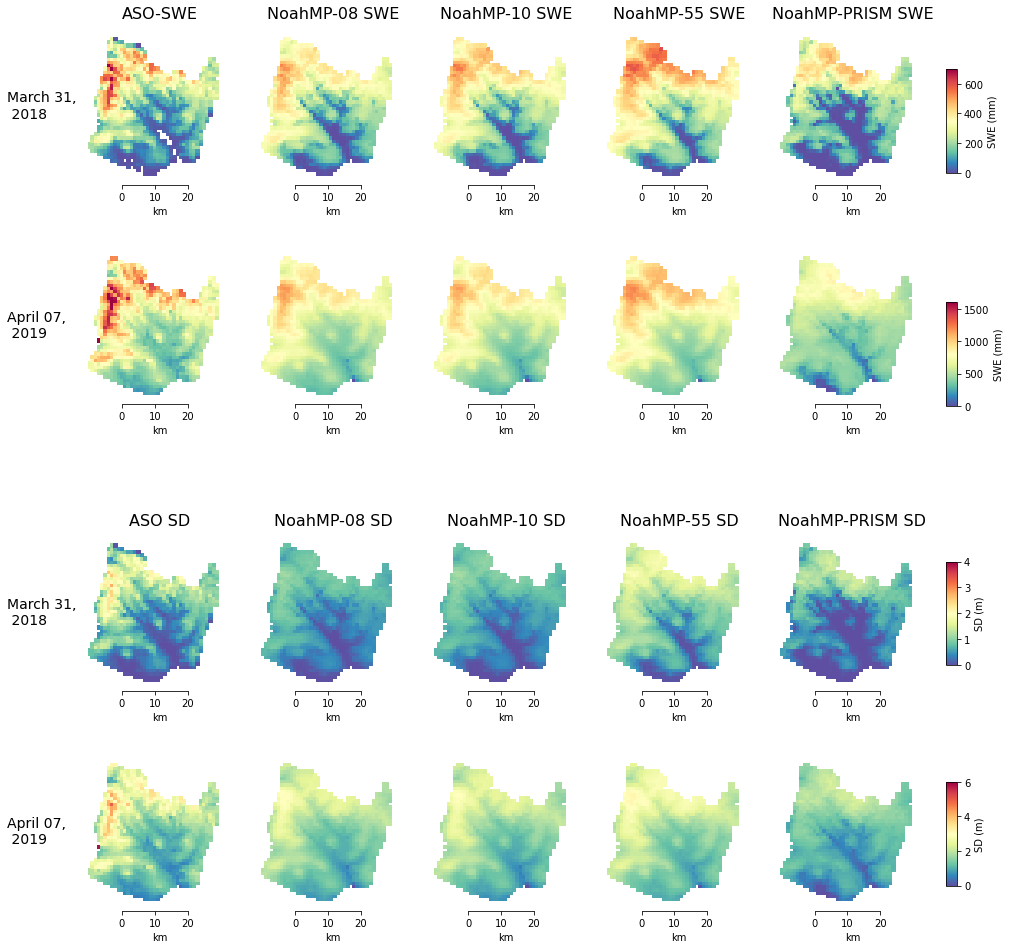

In [50]:
fig, ax = plt.subplots(5, 5, gridspec_kw={'height_ratios': [1,1,.4,1,1]})
                                        

fig.set_size_inches(15,18)
#divnorm = colors.TwoSlopeNorm(vmin=0., vcenter=200, vmax=700)


#mp8_swe_base.plot(ax=ax[0], vmin=0, vmaax=700)

########### PLOT SWE #########
# PLOT 2018

a0 = (aso_swe_corr18 * mask18).coarsen(south_north=4, west_east=4, boundary='trim').mean()
a0.isel(south_north=slice(10, 59)).plot(ax=ax[0,0], vmin=0, vmax=800, cmap='Spectral_r', add_colorbar=False)
a = mp08_swe_2018.coarsen(south_north=4, west_east=4, boundary='trim').mean()
b = mp10_swe_2018.coarsen(south_north=4, west_east=4, boundary='trim').mean()
c = mp55_swe_2018.coarsen(south_north=4, west_east=4, boundary='trim').mean()
d = prism_swe_2018.coarsen(south_north=4, west_east=4, boundary='trim').mean()

a.isel(south_north=slice(10, 59)).plot(ax=ax[0,1], vmin=0, vmax=700, cmap='Spectral_r', add_colorbar=False)
b.isel(south_north=slice(10, 59)).plot(ax=ax[0,2], vmin=0, vmax=700, cmap='Spectral_r', add_colorbar=False)
cbswe2018 = c.isel(south_north=slice(10, 59)).plot(ax=ax[0,3], vmin=0, vmax=700, cmap='Spectral_r', add_colorbar=False)
d.isel(south_north=slice(10, 59)).plot(ax=ax[0,4], vmin=0, vmax=700, cmap='Spectral_r', add_colorbar=False)

#print(spaef(a0, a), spaef(a0, b), spaef(a0, c))

# PLOT 2019 
a0 = (aso_swe_corr19 * mask18).coarsen(south_north=4, west_east=4, boundary='trim').mean()
a0.isel(south_north=slice(10, 59)).plot(ax=ax[1,0], vmin=0, vmax=1600,cmap='Spectral_r', add_colorbar=False)

a = mp08_swe_2019.coarsen(south_north=4, west_east=4, boundary='trim').mean()
b = mp10_swe_2019.coarsen(south_north=4, west_east=4, boundary='trim').mean()
c = mp55_swe_2019.coarsen(south_north=4, west_east=4, boundary='trim').mean()
d = prism_swe_2019.coarsen(south_north=4, west_east=4, boundary='trim').mean()

a.isel(south_north=slice(10, 59)).plot(ax=ax[1,1], vmin=0, vmax=1600, cmap='Spectral_r', add_colorbar=False)
b.isel(south_north=slice(10, 59)).plot(ax=ax[1,2], vmin=0, vmax=1600, cmap='Spectral_r', add_colorbar=False)# cmap='Spectral_r')
cbswe2019 = c.isel(south_north=slice(10, 59)).plot(ax=ax[1,3], vmin=0, vmax=1600, cmap='Spectral_r', add_colorbar=False)# cmap='Spectral_r')
d.isel(south_north=slice(10, 59)).plot(ax=ax[1,4], vmin=0, vmax=1600, cmap='Spectral_r', add_colorbar=False)


########### PLOT SNOW DEPTH #########
a0 = (aso_sd_corr18 * mask18).coarsen(south_north=4, west_east=4, boundary='trim').mean()
a0.isel(south_north=slice(10, 59)).plot(ax=ax[3,0], vmin=0, vmax=4, cmap='Spectral_r', add_colorbar=False)
a = mp08_sd_2018.coarsen(south_north=4, west_east=4, boundary='trim').mean()
b = mp10_sd_2018.coarsen(south_north=4, west_east=4, boundary='trim').mean()
c = mp55_sd_2018.coarsen(south_north=4, west_east=4, boundary='trim').mean()
d = prism_sd_2018.coarsen(south_north=4, west_east=4, boundary='trim').mean()

a.isel(south_north=slice(10, 59)).plot(ax=ax[3,1], vmin=0, vmax=6, cmap='Spectral_r', add_colorbar=False)
b.isel(south_north=slice(10, 59)).plot(ax=ax[3,2], vmin=0, vmax=6, cmap='Spectral_r', add_colorbar=False)
cb2018 = c.isel(south_north=slice(10, 59)).plot(ax=ax[3,3], vmin=0, vmax=4, cmap='Spectral_r', add_colorbar=False)
d.isel(south_north=slice(10, 59)).plot(ax=ax[3,4], vmin=0, vmax=4, cmap='Spectral_r', add_colorbar=False)


# PLOT 2019 
a0 = (aso_sd_corr19 * mask18).coarsen(south_north=4, west_east=4, boundary='trim').mean()
a0.isel(south_north=slice(10, 59)).plot(ax=ax[4,0], vmin=0, vmax=6,cmap='Spectral_r', add_colorbar=False)

a = mp08_sd_2019.coarsen(south_north=4, west_east=4, boundary='trim').mean()
b = mp10_sd_2019.coarsen(south_north=4, west_east=4, boundary='trim').mean()
c = mp55_sd_2019.coarsen(south_north=4, west_east=4, boundary='trim').mean()
d = prism_sd_2019.coarsen(south_north=4, west_east=4, boundary='trim').mean()

a.isel(south_north=slice(10, 59)).plot(ax=ax[4,1], vmin=0, vmax=6, cmap='Spectral_r', add_colorbar=False)
b.isel(south_north=slice(10, 59)).plot(ax=ax[4,2], vmin=0, vmax=6, cmap='Spectral_r', add_colorbar=False)# cmap='Spectral_r')

cb2019 = c.isel(south_north=slice(10, 59)).plot(ax=ax[4,3], vmin=0, vmax=6, cmap='Spectral_r', add_colorbar=False)# cmap='Spectral_r')
d.isel(south_north=slice(10, 59)).plot(ax=ax[4,4], vmin=0, vmax=6, cmap='Spectral_r', add_colorbar=False)# cmap='Spectral_r')

print(spaef(a0, a), 
      spaef(a0, b), 
      spaef(a0, c))
###########################

#(mp10_swe - mp8_swe).plot(ax=ax[3], cmap='bwr_r')

# do stuff to the axes to make them look bertter...
for i in range(5):
    for j in range(5):
        axx = ax[i,j]
        if i == 2:
            axx.axis("off")
            continue
        # loop thru spines         ...
        for spine in ['right', 'top', 'left']: #axx.spines:
            axx.spines[spine].set_visible(False)
        axx.axis('scaled')
        axx.set_xlabel("")
        axx.set_ylabel("")
        axx.set_xticks([10, 20, 30])
        axx.set_yticks([])#[20, 30])
        axx.spines['bottom'].set_bounds(10,30)
        axx.set_xticklabels([0,10,20])
        #axx.set_yticklabels([0,10])
        axx.set_xlabel("km")
        axx.set_title("")
# make the colorbars...


# left bottom w h 
#cb1x = fig.add_axes([.9, .57, .01, .2])
#cb3x = fig.add_axes([.9, .23, .01, .2])

cb2x = fig.add_axes([.92, .73, .01, .08])
cb3x = fig.add_axes([.92, .55, .01, .08])
cb4x = fig.add_axes([.92, .35, .01, .08])
cb5x = fig.add_axes([.92, .18, .01, .08])

cb2 = fig.colorbar(cbswe2018, cax=cb2x)
cb3 = fig.colorbar(cbswe2019, cax=cb3x)
cb4 = fig.colorbar(cb2018, cax=cb4x)
cb5 = fig.colorbar(cb2019, cax=cb5x)

cb2.set_label("SWE (mm)")
cb3.set_label("SWE (mm)")

cb4.set_label("SD (m)")
cb5.set_label("SD (m)")

fig.subplots_adjust(wspace=.2, hspace=-.15)

ax[0,0].text(-25, 20, "March 31, \n 2018", fontsize=14)
ax[1,0].text(-25, 20, "April 07, \n 2019", fontsize=14)

ax[3,0].text(-25, 20, "March 31, \n 2018", fontsize=14)
ax[4,0].text(-25, 20, "April 07, \n 2019", fontsize=14)

ax[3,0].set_title("ASO SD"      , fontsize=16)
ax[3,1].set_title("NoahMP-08 SD", fontsize=16)
ax[3,2].set_title("NoahMP-10 SD", fontsize=16)
ax[3,3].set_title("NoahMP-55 SD", fontsize=16)
ax[3,4].set_title("NoahMP-PRISM SD", fontsize=16)

ax[0,0].set_title("ASO-SWE"      , fontsize=16)
ax[0,1].set_title("NoahMP-08 SWE", fontsize=16)
ax[0,2].set_title("NoahMP-10 SWE", fontsize=16)
ax[0,3].set_title("NoahMP-55 SWE", fontsize=16)
ax[0,4].set_title("NoahMP-PRISM SWE", fontsize=16)



plt.savefig("swe_map_test", facecolor='white', bbox_inches = "tight", dpi=600)

In [25]:
aso0 = (aso_swe_corr18 * mask18).coarsen(south_north=4, west_east=4, boundary='trim').mean()
aso1 = (aso_swe_corr19 * mask18).coarsen(south_north=4, west_east=4, boundary='trim').mean()


a0 = mp08_swe_2018.coarsen(south_north=4, west_east=4, boundary='trim').mean()
b0 = mp10_swe_2018.coarsen(south_north=4, west_east=4, boundary='trim').mean()
c0 = mp55_swe_2018.coarsen(south_north=4, west_east=4, boundary='trim').mean()
d0 = prism_swe_2018.coarsen(south_north=4, west_east=4, boundary='trim').mean()

a1 = mp08_swe_2019.coarsen(south_north=4, west_east=4, boundary='trim').mean()
b1 = mp10_swe_2019.coarsen(south_north=4, west_east=4, boundary='trim').mean()
c1 = mp55_swe_2019.coarsen(south_north=4, west_east=4, boundary='trim').mean()
d1 = prism_swe_2019.coarsen(south_north=4, west_east=4, boundary='trim').mean()


# def rmse(a,b):
#     return np.sqrt(np.mean((a-b)**2))/np.mean(b)

def rmse(a,b):
    return np.sqrt(np.mean((a-b)**2))

def rmspe(a,b):
    return (np.sqrt(np.mean(np.square((a - b) / b)))) * 100


def print_stats(aso, noahmp):
    a = rmse(aso, noahmp) 
    b = pearsonr(aso, noahmp)
    c = spaef(aso,noahmp)
    w = float(noahmp.mean() - aso.mean())
    #wp = ((w/aso.mean())*100).values
    return {"rho":np.round(b, 3), "spaef": np.round(c,3) ,"rmse": np.round(float(a.values/10),3), "wssp":np.round(w,3)}


# print_stats(aso0.isel(Time=0), a0), print_stats(aso0.isel(Time=0), b0), print_stats(aso0.isel(Time=0), c0), print_stats(aso1.isel(Time=0), d1)

#print_stats(aso1.isel(Time=0), a1), print_stats(aso1.isel(Time=0), b1), print_stats(aso1.isel(Time=0), c1),print_stats(aso1.isel(Time=0), d1)


the_string = "{} & {} && {} & {} "

print("  & NoahMP-MP08  & " + the_string.format(*print_stats(aso0.isel(Time=0), a0).values()) + r"\\")
print("& & NoahMP-MP10  & " + the_string.format(*print_stats(aso0.isel(Time=0), b0).values()) + r"\\")
print("& & NoahMP-MP55  & " + the_string.format(*print_stats(aso0.isel(Time=0), c0).values()) + r"\\")
print("& & NoahMP-PRISM & " + the_string.format(*print_stats(aso0.isel(Time=0), d0).values()) + r"\\")


# print("  & NoahMP-MP08  & " + the_string.format(*print_stats(aso1.isel(Time=0), a1).values()) + r"\\[1ex]")
# print("& & NoahMP-MP10  & " + the_string.format(*print_stats(aso1.isel(Time=0), b1).values()) + r"\\[1ex]")
# print("& & NoahMP-MP55  & " + the_string.format(*print_stats(aso1.isel(Time=0), c1).values()) + r"\\[1ex]")
# print("& & NoahMP-PRISM & " + the_string.format(*print_stats(aso1.isel(Time=0), d1).values()) + r"\\[1ex]")


# spaef(aso1.isel(Time=0), a1, bins=1)


  & NoahMP-MP08  & 0.909 & 0.626 && 7.725 & -7.83 \\
& & NoahMP-MP10  & 0.907 & 0.643 && 7.551 & 4.121 \\
& & NoahMP-MP55  & 0.894 & 0.503 && 9.285 & 45.311 \\
& & NoahMP-PRISM & 0.828 & 0.817 && 11.589 & -69.901 \\


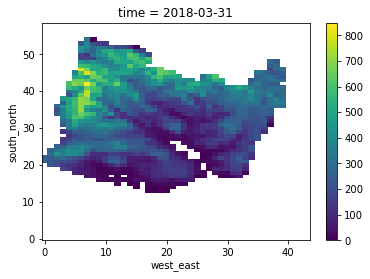

In [28]:
# plt.scatter(aso0[:,:,0].values.flatten(), a1[:,:,0].values.flatten())


In [37]:
aso1.isel(Time=0).mean()

<xarray.DataArray ()>
array(681.62918632)
Coordinates:
    time     datetime64[ns] 2019-04-07

In [38]:
prism_swe_2019.mean()

<xarray.DataArray ()>
array(481.97172108)
Coordinates:
    time     datetime64[ns] 2019-04-07

In [17]:
aso0 = (aso_sd_corr18 * mask18).coarsen(south_north=4, west_east=4, boundary='trim').mean()
aso1 = (aso_sd_corr19 * mask18).coarsen(south_north=4, west_east=4, boundary='trim').mean()


a0 = mp08_sd_2018.coarsen(south_north=4, west_east=4, boundary='trim').mean()
b0 = mp10_sd_2018.coarsen(south_north=4, west_east=4, boundary='trim').mean()
c0 = mp55_sd_2018.coarsen(south_north=4, west_east=4, boundary='trim').mean()
d0 = prism_sd_2018.coarsen(south_north=4, west_east=4, boundary='trim').mean()

a1 = mp08_sd_2019.coarsen(south_north=4, west_east=4, boundary='trim').mean()
b1 = mp10_sd_2019.coarsen(south_north=4, west_east=4, boundary='trim').mean()
c1 = mp55_sd_2019.coarsen(south_north=4, west_east=4, boundary='trim').mean()
d1 = prism_sd_2019.coarsen(south_north=4, west_east=4, boundary='trim').mean()



def rmse(a,b):
    return np.sqrt(np.mean((a-b)**2))

def print_stats(aso, noahmp):
    a = rmse(aso, noahmp)
    b = pearsonr(aso, noahmp)
    c = spaef(aso,noahmp)
    w = float(noahmp.mean() - aso.mean())
    wp = ((w/aso.mean())*100).values
    return {"rho":np.round(b, 3), "spaef": np.round(c,3) ,"rmse": np.round(float(a.values*100.),3), "wss %":np.round(wp,3)}
#    print(str(b) + " & " + str(c) + " & " + str(a) + " & " + str(w) )
    

print("  & NoahMP-MP08  & " + the_string.format(*print_stats(aso0.isel(Time=0), a0).values()) + r"\\[1ex]")
print("& & NoahMP-MP10  & " + the_string.format(*print_stats(aso0.isel(Time=0), b0).values()) + r"\\[1ex]")
print("& & NoahMP-MP55  & " + the_string.format(*print_stats(aso0.isel(Time=0), c0).values()) + r"\\[1ex]")
print("& & NoahMP-PRISM & " + the_string.format(*print_stats(aso0.isel(Time=0), d0).values()) + r"\\[1ex]")
# ?
# print("  & NoahMP-MP08  & " + the_string.format(*print_stats(aso1.isel(Time=0), a1).values()) + r"\\[1ex]")
# print("& & NoahMP-MP10  & " + the_string.format(*print_stats(aso1.isel(Time=0), b1).values()) + r"\\[1ex]")
# print("& & NoahMP-MP55  & " + the_string.format(*print_stats(aso1.isel(Time=0), c1).values()) + r"\\[1ex]")
# print("& & NoahMP-PRISM & " + the_string.format(*print_stats(aso1.isel(Time=0), d1).values()) + r"\\[1ex]")


# print_stats(aso1.isel(Time=0), a1), print_stats(aso1.isel(Time=0), b1), print_stats(aso1.isel(Time=0), c1), print_stats(aso1.isel(Time=0), d1)



  & NoahMP-MP08  & 0.908 & 0.627 && 25.394 & 1.591 \\[1ex]
& & NoahMP-MP10  & 0.905 & 0.658 && 25.164 & 4.205 \\[1ex]
& & NoahMP-MP55  & 0.896 & 0.539 && 30.026 & 19.27 \\[1ex]
& & NoahMP-PRISM & 0.84 & 0.783 && 43.084 & -36.093 \\[1ex]


In [18]:
# #aso19=aso_swe_corr19 * other_mask
# def correlation_by_resample(ds, aso, dxdy):
#     a = ds.coarsen(south_north=dxdy, west_east=dxdy, boundary='trim').mean()
#     b = aso.coarsen(south_north=dxdy, west_east=dxdy, boundary='trim').mean()
#     return xr.corr(a,b)

# def rmse_by_resample(ds, aso, dxdy):
#     a = ds.coarsen(south_north=dxdy, west_east=dxdy, boundary='trim').mean()
#     b = aso.coarsen(south_north=dxdy, west_east=dxdy, boundary='trim').mean()
#     return np.sqrt(np.mean((a- b)**2))

# dxdylist = range(1,20)

# a19  = aso_swe_corr19 * other_mask
# a18  = (aso_swe_corr18 * mask18)

# clist8   = [rmse_by_resample(mp08_swe_2018, a18, z) for z in dxdylist]
# clist10  = [rmse_by_resample(mp10_swe_2018, a18, z) for z in dxdylist]
# clist55  = [rmse_by_resample(mp55_swe_2018, a18, z) for z in dxdylist]



In [19]:
# find regions with low variablity...

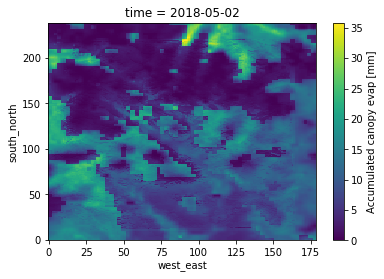

In [20]:
### FIND THE SNOW SUBLIMATION...
mp55_lsmout_2018.ACCECAN.isel(time=-1).plot()

In [21]:
(mp55_lsmout_2018.ACCEDIR.isel(time=-1)*other_mask).mean() + (mp55_lsmout_2018.ACCECAN.isel(time=-1)*other_mask).mean()


<xarray.DataArray ()>
array(74.49580356)
Coordinates:
    time     datetime64[ns] 2018-05-02

In [22]:
mp55_lsmout_2018.ACCEDIR

<xarray.DataArray 'ACCEDIR' (time: 214, south_north: 239, west_east: 179)>
[9155134 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2017-10-01 2017-10-02 ... 2018-05-02
    lat      (south_north, west_east) float32 ...
    lon      (south_north, west_east) float32 ...
Dimensions without coordinates: south_north, west_east
Attributes:
    long_name:     Accumulated direct soil evap
    units:         mm
    grid_mapping:  crs
    valid_range:   [   -10000 100000000]